<a href="https://colab.research.google.com/github/AMRowe99/ECS_Class/blob/main/Boiler_exergy_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Production of superheated steam
An example of exergy analysis for a combustion process to produce superheated steam a.k.a. a boiler

In [24]:
# @title
import numpy as np
import matplotlib.pyplot as plt

%pip install CoolProp
from CoolProp.CoolProp import PropsSI

# set precision of numerical values output
%precision 1
#default to show a plot instead of plt.show()
%matplotlib inline

## The Steam Generator
Liquid octance is burned with air (stochiometric) in a steady-flow apparatus that also houses the boiler and superheater of a steam-turbine power plant. The temperature and pressure conditions at the four ports of the control volume are shown below in the diagram.

The size of the steam generator is such that although the superheated-steam temperature approaches the temperature of the products of combustion, there is a finite temperature difference between the two exiting streams of 177 K.

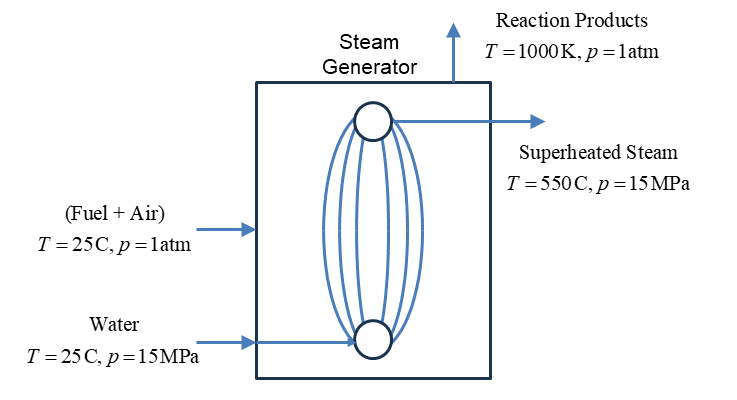

## Reaction
We assume the air composition is represented adequately by a mixture of oxygen (0.21) and nitrogen (0.79) and reacts with a hydrocarbon fuel.

\begin{equation}
C_{\alpha}H_{\beta}+ \lambda \left( \alpha +\frac{\beta}{4} \right) 4.76 \left( 0.21O_{2}+0.79N_{2} \right)=\alpha CO_{2}+\frac{\beta}{2} H_{2}O+ \lambda \left( \alpha +\frac{\beta}{4} \right) 3.76 N_{2} + (\lambda-1)\left( \alpha +\frac{\beta}{4} \right)O_{2}
\end{equation}

The fuel (hydrocarbon) and air enter as a stoichiometrically balanced mixture ($\lambda = 1$) so,

\begin{equation}
C_{\alpha}H_{\beta}+ \left( \alpha +\frac{\beta}{4} \right) \left( O_{2}+3.76N_{2} \right)=\alpha CO_{2}+\frac{\beta}{2} H_{2}O+ \left( \alpha +\frac{\beta}{4} \right) 3.76 N_{2}
\end{equation}

We assume the fuel is equivalent to octane $C_{8}H_{18}$; the fuel and air react according to the following,

\begin{equation}
C_{8}H_{18}+ 12.5(O_{2}+3.76N_{2})=8CO_{2}+9H_{2}O+(12.5)(3.76)N_{2}
\end{equation}

We assume that the temperature of the products' is sufficiently low so that we can neglect the possiblity of dissociation i.e. products remain as listed.


# Analysis
We are interested in the required fuel flow rate and the degree of irreverisiblity i.e. how does the exergy destruction compare to the exergy input? Or, how much of the exergy input shows up in the superheated steam?

As a learning exercise we will go through this problem a couple of ways.

## Exergy Balance
First, perform an exergy balance. Note, the water is a completetly separate stream from the fuel, air, combustion products. A steady-state exergy balance gives,

\begin{equation}
\dot{E}_{x,R}=\dot{E}_{x,ss}-\dot{E}_{x,w} + \dot{E}_{x,P}+\dot{E}_{x,D}
\end{equation}

where we have specifically captured reactants, $R$, combutions products, $P$, superheated steam, $ss$, water, $w$, and destruction, $D$. We have assumed negligible heat transfer with the environment (the intention is for the heat of reaction to be transferred to the water.)

Rewriting to solve for exergy destruction,

\begin{equation}
\dot{E}_{x,D}=\left( \dot{E}_{x,R}- \dot{E}_{x,P} \right) - \left( \dot{E}_{x,ss}-\dot{E}_{x,w} \right)
\end{equation}

Now, we can write the exergy for each flux in terms of flow-rates and properties,

\begin{equation}
\dot{E}_{x,D}= \left( \dot{n}_{R}  \bar{e}_{xf,R}- \dot{n}_{P} \bar{e}_{xf,CG} \right) - \dot{n}_{w} \left( \bar{e}_{xf,ss}- \bar{e}_{xf,w}  \right)
\end{equation}

Water flows through the steam generator so flow in and out is the same. There is a reaction between air and fuel so the number of moles of reactants may not be the same as combutions products.

Re-writing to give the destruction per mole of fuel,

\begin{equation}
\frac{\dot{E}_{x,D}}{\dot{n}_{F}}= \left( \frac{\dot{n}_{R}}{\dot{n}_{F}}  \bar{e}_{xf,R}- \frac{\dot{n}_{P}}{\dot{n}_{F}} \bar{e}_{xf,CG} \right) - \frac{\dot{n}_{w}}{\dot{n}_{F}} \left( \bar{e}_{xf,ss}- \bar{e}_{xf,w}  \right)
\end{equation}

From stoichiometry we find the coefficients for the reacant and product streams,

\begin{equation}
\frac{\dot{n}_{R}}{\dot{n}_{F}}=1+12.5+47=60.5\\
\frac{\dot{n}_{CG}}{\dot{n}_{F}}=8+9+47=64
\end{equation}

and, we also have the weightings on each component in each mixture,

\begin{equation}
\text{Reactant Mix:  } x_{F}=\frac{1}{60.5}=0.0165, x_{O_{2}}=\frac{12.5}{60.5}=0.207, x_{N_{2}}=\frac{47}{60.5}=0.777  \\
\text{Product Mix:  } x_{CO_{2}}=\frac{8}{64}=0.125, x_{H_{2}O}=\frac{9}{64}=0.141, x_{N_{2}}=\frac{47}{64}=0.734  
\end{equation}

In [43]:
# @title
# ratios
nR_nF=60.5
nP_nF=64

# Reactant stream
xF_R=1/60.5
xO2_R=12.5/60.5
xN2_R=1-xF_R-xO2_R

xR=np.array([xF_R, xO2_R, xN2_R])

# Product stream
xCO2_P=8/64
xH2O_P=9/64
xN2_P=1-xCO2_P-xH2O_P

xP=np.array([xCO2_P, xH2O_P, xN2_P])

##Exergy Change of Water
The change in state of the water is between liquid and superheated vapour. We can write the change in flow exergy using the definition, thus,

\begin{equation}
\Delta \bar{e}_{xf}= \bar{e}_{xf,ss}- \bar{e}_{xf,w} = h_{ss} - h_{w} - T_{0} \left (s_{ss} - s_{w} \right)
\end{equation}

We can get the property data from CoolProp.

In [44]:
# @title
# Water
Mw=0.018 # molar mass 18 kg/mol
T0=298
Tw1=298
Tw2=823
Pw=15e6

Tvec=[Tw1, Tw2]
hw1, hw2=PropsSI('Hmolar', 'T', Tvec, 'P', Pw, 'H2O')   # J/mol
sw1, sw2=PropsSI('Smolar', 'T', Tvec, 'P', Pw, 'H2O')   # J/mol-K

dhw=hw2-hw1
dsw=sw2-sw1

dex_w=(dhw-T0*dsw)
dex_wm=dex_w/Mw/1000   # convert to kJ/kg

print('The change in exergy for water is %3.3e kJ/kg-H2O.' % dex_wm)

The change in exergy for water is 1.497e+03 kJ/kg-H2O.


## Mixture exergy
The exergy released due to the reaction is the determined by the reactant and products. Recall, the general form for the exergy of a mixture (assuming an ideal mixture) is,

\begin{equation}
\bar{e}_{xf,total}= \sum_{i} x_{i} \left( \bar{e}_{xf,tm,i} +\bar{e}_{x,ch,i} +\bar{R}T_{0} \ln (x_{i}) \right)
\end{equation}

where the first term is the thermomechanical flow exergy of a pure constituent $i$ at the mixture pressure and temperature, the second term is the chemical exergy of the pure constituent $i$, and the last term is the deviation of chemical exergy (from the pure state) due to the concentration of constituent $i$ in the mixture.

The thermomechanical exergy for each pure ideal gas constituent can be estimated using mixture temperature and pressure,

\begin{equation}
\bar{e}_{xf,tm}= \bar{c}_{p} T_0 \left( \frac{T}{T_{0}}-1- \ln \left( \frac{T}{T_{0}} \right) \right) +\bar{R}T_{0} \ln \left( \frac{p}{p_{0}} \right)
\end{equation}

where the mixture specific heat is, $\bar{c}_{p}=\sum x_{i} \bar{c}_{pi}M_{i}$.

Note, if we want we can write the total flow exergy as the sum of two terms, one being the effect of temperature and partial pressure, the other the chemical exergy of the pure constituent. The expressions are equivalent, but the concentration impact is just not explicitly separated:

\begin{equation}
\bar{e}_{xf,total}= \sum_{i} x_{i} \left( \bar{e}_{xf,i}(T,p_{i}) +\bar{e}_{x,ch,i}  \right)
\end{equation}

and, if we use the ideal gas expression,

\begin{equation}
\bar{e}_{xf,i}(T,p_{i})= \bar{c}_{pi} T_0 \left( \frac{T}{T_{0}}-1- \ln \left( \frac{T}{T_{0}} \right) \right) +\bar{R}T_{0} \ln \left( \frac{x_{i}p}{p_{0}} \right)
\end{equation}


##Chemical Exergies
The reactant and product mixes require pure substance chemical exergies. We can get these from tables:

\begin{equation}
\bar{e}_{ch,F}=5419 \; \text{kJ/mol},\; \bar{e}_{ch,O_{2}}=4 \; \text{kJ/mol},\; \bar{e}_{ch,N_{2}}=0.7 \; \text{kJ/mol}\\
{e}_{ch,CO_{2}}=19.9 \; \text{kJ/mol},\; {e}_{ch,H_{2}O}=9.5 \; \text{kJ/mol}
\end{equation}

In [45]:
# @title
# chemical exergies of pure substances
ech_F=5419000 # J/mol (gaseous octane)
ech_O2=4000
ech_N2=700
ech_CO2=19900
#ech_H2O=9500 # vapour
ech_H20=900 # liquid

ech_R=np.array([ech_F, ech_O2, ech_N2])
ech_P=np.array([ech_CO2, ech_H2O, ech_N2])

## Flow rates
To solve for exergy destruction, we need to determine the ratio of molar flow rate of water to fuel. These are two separate streams (ratios are not deterimined by stoichiometry.) The other constraint we can apply to give us this information is the energy balance,

\begin{equation}
(\dot{n} \bar{h})_{w}+(\dot{n} \bar{h})_{R}=(\dot{n} \bar{h})_{ss}+(\dot{n} \bar{h})_{P}
\end{equation}

so,

\begin{equation}
\frac{\dot{n}_{w}}{\dot{n}_{F}} =\frac{\frac{\dot{n}_{P}}{\dot{n}_{F}} \bar{h}_{P}-\frac{\dot{n}_{R}}{\dot{n}_{F}} \bar{h}_{R}}{ \bar{h}_{w} - \bar{h}_{ss}}
\end{equation}

NOTE: If we are calculating enthalpy and entropy changes between reactant and products, we must be sure to use the total enthalpy and absolute entropy. The reactant and product mixture enthalpies and entropies are given by (assuming ideal mixtures):

\begin{equation}
\bar{h}(T)=\sum_{i} x_{i} \left( \bar{h}_{f,i}^{0} + \Delta \bar{h}_{i} \right) \\
\bar{s}(T,p_{i})=\sum_{i} x_{i} \left( \bar{s}_{i}^{0} + \Delta \bar{s}_{i} \right)
\end{equation}

We need to ensure we use the enthalpy of formation and reference state entropy for the reactants and products. This information is summarized in the following table.

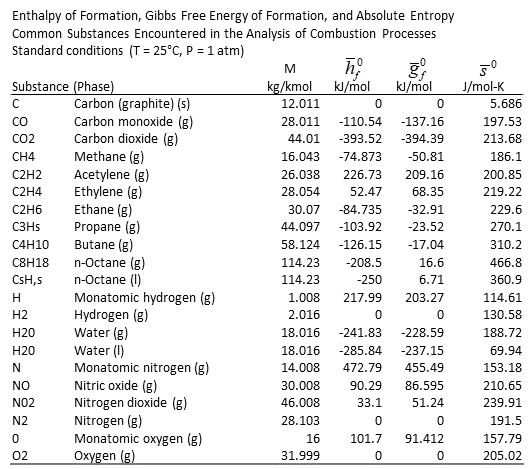

In [46]:
# @title
# enthalpies and entropies of reactant and products
T0=298
P0=101.3e3

TR=298
PR=101.3e3

TP=1000
PP=101.3e3

#hf_octane=-208500   #J/mol (gaseous)
hf_octane=-250000   #J/mol (liquid)
hf_O2=0
hf_N2=0
hf_CO2=-393500
hf_H2O=-241800

#sref_octane=466.8   #J/molK (gaseous)
sref_octane=360.9   #J/molK (liquid)
sref_O2=205.02
sref_N2=191.50
sref_CO2=213.68
sref_H2O=188.72 # vapour

Rmix=np.array(['Octane', 'O2', 'N2'])
Pmix=np.array(['CO2', 'H2O', 'N2'])

# Reactant mixture properties
hRi=np.zeros(len(Rmix))
hRi_ref=np.zeros(len(Rmix))
sRi=np.zeros(len(Rmix))
sRi_ref=np.zeros(len(Rmix))
hfRi=np.array([hf_octane, hf_O2, hf_N2])
sref_Ri=np.array([sref_octane, sref_O2, sref_N2])

for i in np.arange(len(Rmix)):
  hRi[i]=PropsSI('Hmolar', 'T', TR, 'P', PR, Rmix[i])   # J/mol
  hRi_ref[i]=PropsSI('Hmolar', 'T', T0, 'P', P0, Rmix[i])   # J/mol
  sRi[i]=PropsSI('Smolar', 'T', TR, 'P', xR[i]*PR, Rmix[i])   # J/mol-K
  sRi_ref[i]=PropsSI('Smolar', 'T', T0, 'P', xR[i]*P0, Rmix[i])   # J/mol-K

dh_Ri=hRi-hRi_ref
ds_Ri=sRi-sRi_ref

hR=sum(xR*(hfRi + dh_Ri))   # total mixture enthalpy
sR=sum(xR*(sref_Ri + ds_Ri))# total mixture enthalpy

# Product mixture properties
hPi=np.zeros(len(Pmix))
hPi_ref=np.zeros(len(Pmix))
sPi=np.zeros(len(Pmix))
sPi_ref=np.zeros(len(Pmix))
hfPi=np.array([hf_CO2, hf_H2O, hf_N2])
sref_Pi=np.array([sref_CO2, sref_H2O, sref_N2])

for i in np.arange(len(Pmix)):
  hPi[i]=PropsSI('Hmolar', 'T', TP, 'P', PP, Pmix[i])   # J/mol
  hPi_ref[i]=PropsSI('Hmolar', 'T', T0, 'P', P0, Pmix[i])   # J/mol
  sPi[i]=PropsSI('Smolar', 'T', TP, 'P', xP[i]*PP, Pmix[i])   # J/mol-K
  sPi_ref[i]=PropsSI('Smolar', 'T', T0, 'P', xP[i]*P0, Pmix[i])   # J/mol-K

hPi_ref[1]=PropsSI('Hmolar', 'T', T0, 'Q', 1, Pmix[1])   # J/mol-K Assume vapour for water
sPi_ref[1]=PropsSI('Smolar', 'T', T0, 'Q', 1, Pmix[1])   # J/mol-K Assume vapour for water

dh_Pi=hPi-hPi_ref
ds_Pi=sPi-sPi_ref

hP=sum(xP*(hfPi + dh_Pi))
sP=sum(xP*(sref_Pi + ds_Pi))

# flow rate ratio of water to fuel
nw_nF=(nP_nF*hP-nR_nF*hR)/(hw1-hw2)

print('The reactant mixture enthalpy per mole of octane is, HR/nF = %1.2e J/mol-fuel' %(nR_nF*hR))
print('The product mixture enthalpy per mole of octane is, SP/nF = %2.2e J/mol-fuel' %(nP_nF*hP))


The reactant mixture enthalpy per mole of octane is, HR/nF = -2.50e+05 J/mol-fuel
The product mixture enthalpy per mole of octane is, SP/nF = -3.81e+06 J/mol-fuel


#Solve
We can now quantify all of the terms to determine exergy destruction per mol of fuel and other metrics:

In [47]:
# @title
# total flow exergies
ex_R=sum(xR*(dh_Ri-T0*ds_Ri + ech_R)) # reactant mix exergy per mole
ex_P=sum(xP*(dh_Pi-T0*ds_Pi + ech_P)) # product mix exergy per mole

exR_nF=nR_nF*ex_R
exP_nF=nP_nF*ex_P

dEx_RP=exR_nF-exP_nF
dEx_w=nw_nF*dex_w

print('The exergy input rate in the reactant mix is, ExR/nF = %5.2e J/mol-fuel.' %exR_nF)

ExD_nF=dEx_RP-dEx_w
print('The exergy destruction per mole of octane is, ExD/nF = %5.2e J/mol-fuel.' %ExD_nF)

ExD_ExF=ExD_nF/ech_F
print('The rate of exergy destruction relative to octane exergy input rate is,  ExD/ExF = %5.3f.' %ExD_ExF)

eff1=dEx_w/ech_F  # product exergy relative to octane exergy input
print('The exergy change in the water stream relative to the fuel exergy is, (Exs-Exw)/Ex_F = %3.3f.' %eff1)

#eff2=dEx_w/dEx_RP  # product exergy relative to exergy released from reaction
#print('The exergy change in the water stream relative to the reaction exergy, (Exs-Exw)/Ex_RP = %3.3f.' %eff2)

print('The exergy lost to the environment in the combustion gas is, ExP/Ex_F = %3.3f.' %(exP_nF/ech_F))

The exergy input rate in the reactant mix is, ExR/nF = 5.50e+06 J/mol-fuel.
The exergy destruction per mole of octane is, ExD/nF = 2.84e+06 J/mol-fuel.
The rate of exergy destruction relative to octane exergy input rate is,  ExD/ExF = 0.525.
The exergy change in the water stream relative to the fuel exergy is, (Exs-Exw)/Ex_F = 0.295.
The exergy lost to the environment in the combustion gas is, ExP/Ex_F = 0.196.


What does this tell us? We see ~50% of the exergy in octane is destroyed in the steam generator and ~30% of the octane value resides in changing the state of water to superheated steam. The purpose of buying the equipment is to change the state of water and we would like to do it with as little fuel as possible. Unforunately, this magnitude of exergy destruction in a combustion process is not unusual - combustion is highly irreversible.

Finally, we also see that the remaining octane exergy ~20% is being lost to the environment in the combustion products. This is a waste. Perhaps we can do something to capture this exergy...

##Check
We know entropy generation and exergy desruction are equated by the dead-state temperature. Let us do a check using entropy accounting in terms of entropy per mole of fuel:

\begin{equation}
\dot{S}_{gen}=\dot{S}_{P}-\dot{S}_{R} + \dot{S}_{ss}-\dot{S}_{w} \\
\bar{s}_{gen}=\frac{\dot{n}_{P}}{\dot{n}_{F}}\bar{s}_{P}-\frac{\dot{n}_{R}}{\dot{n}_{F}}\bar{s}_{R}+\frac{\dot{n}_{w}}{\dot{n}_{F}}\bar{s}_{ss}-\frac{\dot{n}_{w}}{\dot{n}_{F}}\bar{s}_{w}
\end{equation}

and
\begin{equation}
\frac{\dot{E}_{xD}}{\dot{n}_{F}}=T_{0}\bar{s}_{gen}
\end{equation}


In [49]:
# @title
# Entropy generation per mole of fuel
sgen=nP_nF*sP-nR_nF*sR+nw_nF*dsw
ExDs_nF=T0*sgen

print('The reactant mixture entropy per mole of octane is, SR/nF = %1.2e J/mol-fuel-K' %(nR_nF*sR))
print('The product mixture entropy per mole of octane is, SP/nF = %2.2e J/mol-fuel-K' %(nP_nF*sP))
print('The entropy generation per mole of octane is, Sgen/nF = %2.2e J/mol-fuel-K' %(sgen))
print('The exergy destruction per mole of octane is, T0xSgen/nF = %5.2e J/mol-fuel' %ExDs_nF)

# Difference
Error=(ExD_nF-ExDs_nF)/ExDs_nF
print('The error between second law and exergy for destruction is = %2.1f%%.' %(Error*100))

The reactant mixture entropy per mole of octane is, SR/nF = 1.19e+04 J/mol-fuel-K
The product mixture entropy per mole of octane is, SP/nF = 1.49e+04 J/mol-fuel-K
The entropy generation per mole of octane is, Sgen/nF = 9.52e+03 J/mol-fuel-K
The exergy destruction per mole of octane is, T0xSgen/nF = 2.84e+06 J/mol-fuel
The error between second law and exergy for destruction is = 0.2%.


The difference is negligible.